In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

history_df = pd.read_sql('SELECT * FROM player_history', sqlite3.connect('steam_top100_with_names.db'))
games_df = pd.read_sql('SELECT * FROM games', sqlite3.connect('steam_top100_with_names.db'))
combined_df = pd.merge(history_df, games_df, on='appid')
combined_df

,appid,month,avg_players,peak_players,year,month_num,game_name
0,730,Last 30 Days,914682.70,1427300,2025,8,Counter-Strike 2
1,730,July 2025,920069.98,1427300,2025,7,Counter-Strike 2
2,730,June 2025,1010123.99,1725815,2025,6,Counter-Strike 2
3,730,May 2025,1038596.81,1712216,2025,5,Counter-Strike 2
4,730,April 2025,1045701.65,1811827,2025,4,Counter-Strike 2
...,...,...,...,...,...,...,...
2338,221100,January 2013,0.42,4,2013,1,DayZ
2339,221100,December 2012,0.33,5,2012,12,DayZ
2340,221100,November 2012,0.46,5,2012,11,DayZ
2341,221100,October 2012,0.13,3,2012,10,DayZ


Practice grouping data bu names and plotting them

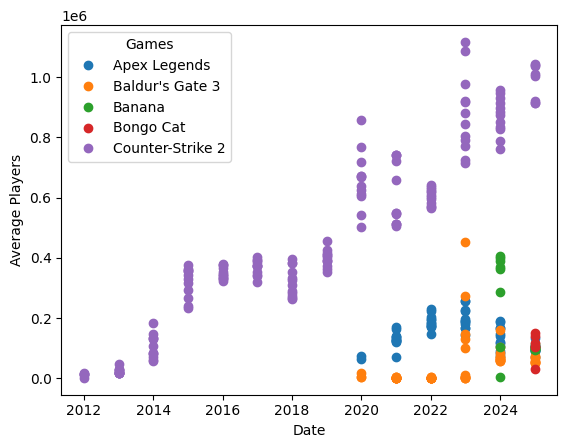

In [217]:
names = combined_df.groupby('game_name')
fig, ax = plt.subplots()
for name, g in list(names)[:5]:
    ax.plot(g["year"], g["avg_players"], marker="o", linestyle="", label=name)  # scatter
ax.set_xlabel("Date")        # rename as needed
ax.set_ylabel("Average Players")
ax.legend(title="Games")
plt.show()


Visualize the average player trends from the games created in 2012

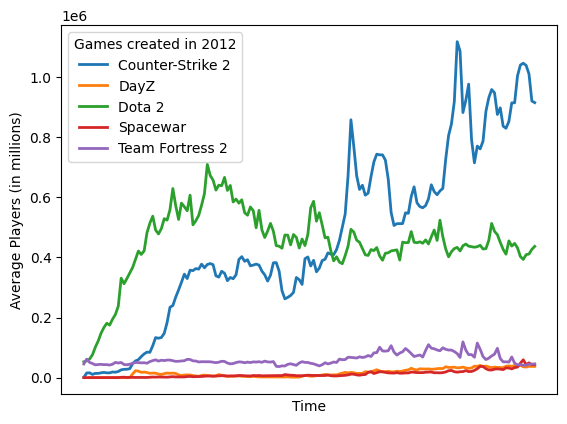

In [218]:
conn = sqlite3.connect('steam_top100_with_names.db')
df_2012 = pd.read_sql("""
    SELECT 
        g.game_name,
        g.appid,
        ph.month,
        ph.avg_players,
        ph.peak_players,
        ph.year
    FROM games g
    JOIN player_history ph ON g.appid = ph.appid
    WHERE g.appid IN (
        SELECT  appid
        FROM player_history
        GROUP BY appid
        HAVING MIN(year) = 2012
    )
    ORDER BY g.game_name, ph.year, ph.month_num;
""", conn)
names = df_2012.groupby('game_name')
fig, ax = plt.subplots()
for name, g in list(names)[:]:
    ax.plot(g["month"], g["avg_players"], marker="", linewidth=2, label=name)  # scatter
ax.set_xlabel("Time")        # rename as needed
ax.set_ylabel("Average Players (in millions)")
ax.legend(title="Games created in 2012")
ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

plt.show()

Visualize the average player trends from the games created in 2012

    game_name   appid          month  avg_players  peak_players  year
0        DayZ  221100  December 2013     12471.61         45398  2013
1        DayZ  221100   January 2014     23093.53         42545  2014
2        DayZ  221100  February 2014     21764.03         40857  2014
3        DayZ  221100     March 2014     17548.31         35993  2014
4        DayZ  221100     April 2014     18665.75         36653  2014
..        ...     ...            ...          ...           ...   ...
717  Warframe  230410     April 2025     46433.86         71082  2025
718  Warframe  230410       May 2025     43464.03         73021  2025
719  Warframe  230410      June 2025     43444.33         98841  2025
720  Warframe  230410      July 2025     48453.91        117575  2025
721  Warframe  230410   Last 30 Days     49598.11        117575  2025

[722 rows x 6 columns]


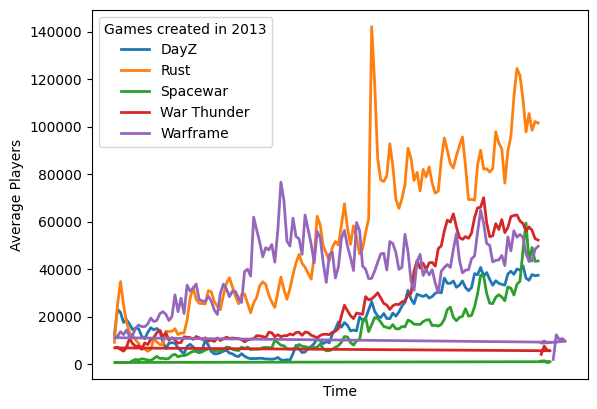

In [219]:
conn = sqlite3.connect('steam_data_cleaned.db')
df_2013 = pd.read_sql("""
    SELECT 
        g.game_name,
        g.appid,
        ph.month,
        ph.avg_players,
        ph.peak_players,
        ph.year
    FROM games g
    JOIN player_history ph ON g.appid = ph.appid
    WHERE g.appid IN (
        SELECT  appid
        FROM player_history
        GROUP BY appid
        HAVING MIN(year) = 2013
    )
    ORDER BY g.game_name, ph.year, ph.month_num;
""", conn)

names = df_2013.groupby('game_name')
fig, ax = plt.subplots()
for name, g in list(names):
    ax.plot(g["month"], g["avg_players"], marker="", linewidth=2, label=name)  # scatter
ax.set_xlabel("Time")        # rename as needed
ax.set_ylabel("Average Players")
ax.legend(title="Games created in 2013")
ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
print(df_2013)
plt.show()